In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_1 = pd.read_csv('data/export_20feb_20_23pm_full_update.csv')
df_1.head()

,Unnamed: 0,SDATEHOUR,SITE_NAME,NETWORK_TYPE,AREA,AREA_TYPE,AREA2,AREA3,LONGITUDE,LATITUDE,...,UL_PKT_COUNT_ALL,UL_PKT_LOST_COUNT_ALL,UL_PAYLOAD_DATA_TOTAL_SIZE,UL_PAYLOAD_DATA_SIZE,DL_PKT_COUNT_ALL,DL_PKT_LOST_COUNT_ALL,DL_PAYLOAD_DATA_TOTAL_SIZE,DL_PAYLOAD_DATA_SIZE,DIR,CODEC_RATE
0,0,20200220 07,OTR0374L_C1,eUTRAN,OTR,B66,East,Toronto,-79.231896,43.780936,...,0,0,0,0,0,0,0,0,2,12650
1,1,20200220 07,OTR0646L_C1,eUTRAN,OTR,B66,East,Toronto,-79.752588,43.663444,...,0,0,0,0,0,0,0,0,1,12650
2,2,20200220 07,OTR0646L_C1,eUTRAN,OTR,B66,East,Toronto,-79.752588,43.663444,...,725,5,55751,51417,606,0,46547,39593,1,12650
3,3,20200220 07,OTR0511L_B1,eUTRAN,OTR,B66,East,Toronto,-79.723706,43.664807,...,0,0,0,0,0,0,0,0,1,12200
4,4,20200220 07,OOT0063L_A1,eUTRAN,OOT,B4,East,Ottawa,-75.803776,45.332680,...,0,0,0,0,0,0,0,0,1,23850


In [3]:
df_1[df_1.isnull().sum(axis=1) > 5]

,Unnamed: 0,SDATEHOUR,SITE_NAME,NETWORK_TYPE,AREA,AREA_TYPE,AREA2,AREA3,LONGITUDE,LATITUDE,...,UL_PKT_COUNT_ALL,UL_PKT_LOST_COUNT_ALL,UL_PAYLOAD_DATA_TOTAL_SIZE,UL_PAYLOAD_DATA_SIZE,DL_PKT_COUNT_ALL,DL_PKT_LOST_COUNT_ALL,DL_PAYLOAD_DATA_TOTAL_SIZE,DL_PAYLOAD_DATA_SIZE,DIR,CODEC_RATE
1304725,1304725,20200220 10,NaN,eUTRAN,NaN,B66,NaN,NaN,-79.396091,43.627503,...,0,0,0,0,0,0,0,0,1,12200
1304726,1304726,20200220 10,NaN,eUTRAN,NaN,B66,NaN,NaN,-79.396091,43.627503,...,29,0,5861,1538,120,0,14134,8466,1,12200
1556717,1556717,20200220 10,NaN,eUTRAN,NaN,B66,NaN,NaN,-79.396091,43.627503,...,32,0,7620,794,54,0,12496,3456,1,23050
1580349,1580349,20200220 10,NaN,eUTRAN,NaN,B66,NaN,NaN,-79.396091,43.627503,...,0,0,0,0,0,0,0,0,1,12200
1580350,1580350,20200220 10,NaN,eUTRAN,NaN,B66,NaN,NaN,-79.396091,43.627503,...,21,0,5687,1162,45,0,9065,3168,1,12200


In [4]:
df_1 = df_1.dropna(axis=0, subset=['SITE_NAME'])

In [6]:
df_1.shape

(1894350, 51)

In [7]:
df_1['AREA'] = df_1['AREA'].astype('category')
df_1['TotalTraffic'] = df_1['TRAFFIC_UL'] + df_1['TRAFFIC_DL']
df_1['TS_START'] = pd.to_datetime(df_1['TS_START'])

In [10]:
df_1['date'] = df_1['TS_START'].dt.date
df_1['hour'] = df_1['TS_START'].dt.hour
df_1['minute'] = df_1['TS_START'].dt.minute
df_1['hour_min'] = df_1['hour'].map(str) + '_' + df_1['minute'].map(str)

In [11]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894350 entries, 0 to 1894851
Data columns (total 56 columns):
Unnamed: 0                    int64
SDATEHOUR                     object
SITE_NAME                     object
NETWORK_TYPE                  object
AREA                          category
AREA_TYPE                     object
AREA2                         object
AREA3                         object
LONGITUDE                     float64
LATITUDE                      float64
IPADD_DOTNUMFORMAT(SGW_IP)    object
TS_START                      datetime64[ns]
TS_END                        object
UL_PKT_COUNT                  int64
UL_PKT_LOST_COUNT             int64
UL_PKT_COUNT_1                int64
UL_PKT_LOST_COUNT_1           int64
UL_PKT_LATENCY                int64
UL_PKT_JITTER                 int64
UL_MOS                        float64
UL_R_FACTOR                   int64
UL_INTERRUPTION               int64
DL_PKT_COUNT                  int64
DL_PKT_LOST_COUNT             int

In [14]:
df_test = df_1[['hour','minute', 'TS_START','hour_min','SITE_NAME','TotalTraffic', 'AREA_TYPE','AREA', 'LONGITUDE', 'LATITUDE']]

In [15]:
df_test

,hour,minute,TS_START,hour_min,SITE_NAME,TotalTraffic,AREA_TYPE,AREA,LONGITUDE,LATITUDE
0,19,56,2020-02-20 19:56:10.452545,19_56,OTR0374L_C1,241692,B66,OTR,-79.231896,43.780936
1,19,59,2020-02-20 19:59:56.335779,19_59,OTR0646L_C1,12351,B66,OTR,-79.752588,43.663444
2,19,59,2020-02-20 19:59:29.046554,19_59,OTR0646L_C1,53354,B66,OTR,-79.752588,43.663444
3,19,59,2020-02-20 19:59:33.066874,19_59,OTR0511L_B1,70328,B66,OTR,-79.723706,43.664807
4,19,59,2020-02-20 19:59:14.230817,19_59,OOT0063L_A1,147361,B4,OOT,-75.803776,45.332680
...,...,...,...,...,...,...,...,...,...,...
1894847,23,52,2020-02-20 23:52:36.208924,23_52,BVA0196L_C1,82191,B66,BVA,-122.648728,49.059975
1894848,23,55,2020-02-20 23:55:29.180810,23_55,BVA0159L_B3,104200,B13,BVA,-122.843242,49.136075
1894849,23,55,2020-02-20 23:55:16.452934,23_55,BVA0159L_B3,104200,B13,BVA,-122.843242,49.136075
1894850,23,53,2020-02-20 23:53:37.247889,23_53,AED0021L_C1,24617,B66,AED,-113.393154,53.480214


In [19]:
time_df_1 = df_test.groupby(["hour_min", "AREA"])["TotalTraffic"].mean()
print(time_df_1.head())

hour_min  AREA
18_11     ACA    NaN
          AED    NaN
          AFS    NaN
          AIR    NaN
          ALB    NaN
Name: TotalTraffic, dtype: float64


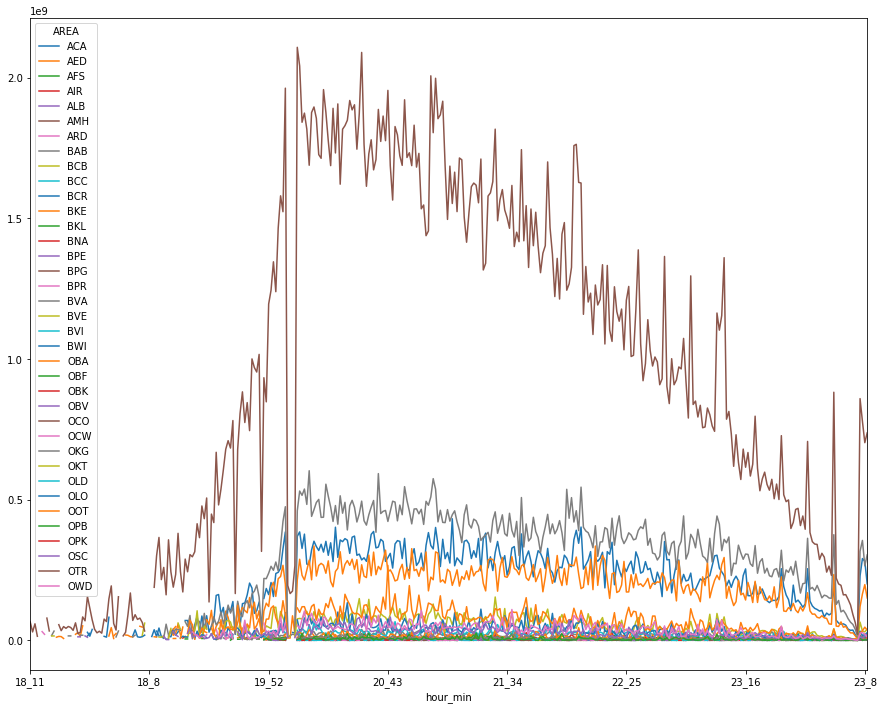

In [21]:
fig, ax = plt.subplots(figsize=(15,12))
df_1.groupby(["hour_min", "AREA"])["TotalTraffic"].sum().unstack().plot(ax=ax)

Enter Market name : BVA
Fetching site wise details of market BVA


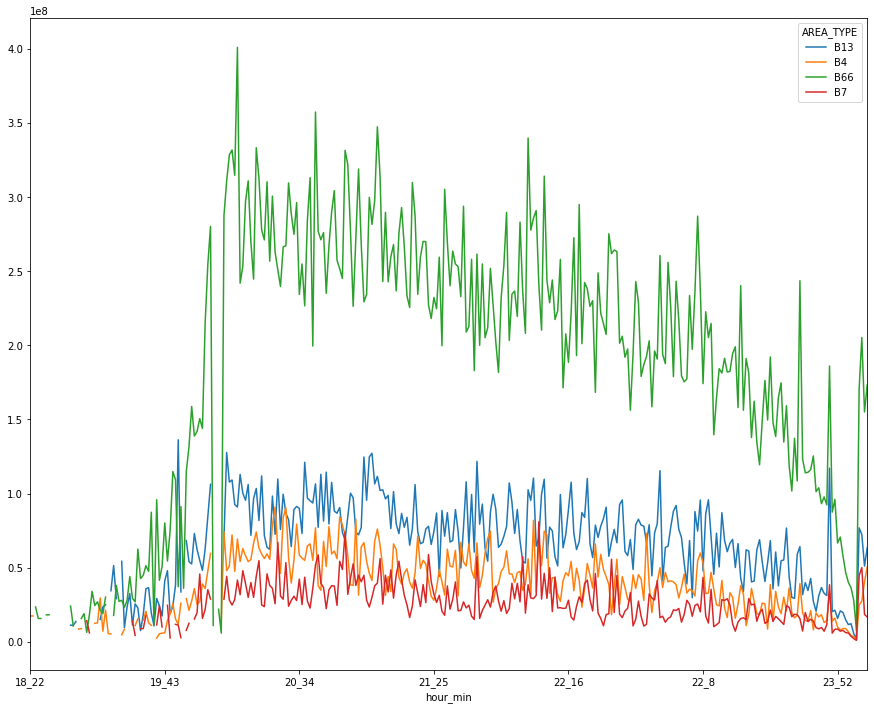

In [35]:
m = input("Enter Market name : ") 
print("Fetching site wise details of market", m)
df_m = df_test.loc[df_test['AREA'] == m]
fig, ax = plt.subplots(figsize=(15,12))
df_m.groupby(["hour_min", "AREA_TYPE"])["TotalTraffic"].sum().unstack().plot(ax=ax)

Enter Market name : BVA
Enter Band Information : B13
Fetching site wise details of market Vs band BVA _ B13


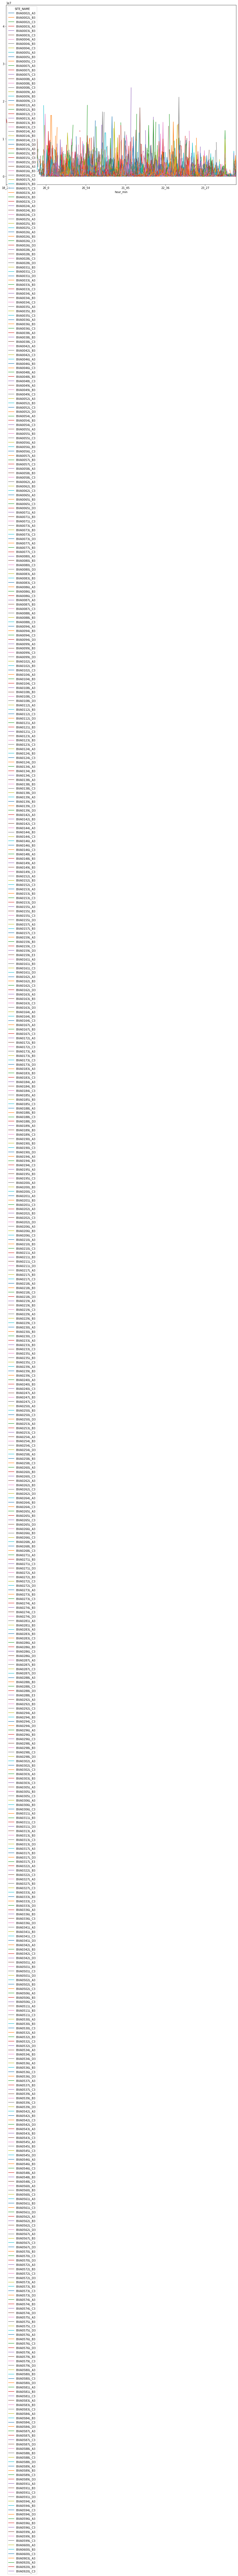

In [58]:
m = input("Enter Market name : ") 
b = input("Enter Band Information : ") 
print("Fetching site wise details of market Vs band", m,"_",b)
df_m_b = df_test.loc[(df_test['AREA'] == m ) & (df_test['AREA_TYPE'] == b)]
fig, ax = plt.subplots(figsize=(15,12))
df_m_b.groupby(["hour_min", "SITE_NAME"])["TotalTraffic"].sum().unstack().plot(ax=ax)



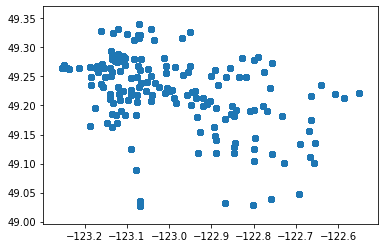

In [59]:
plt.scatter(x=df_m_b['LONGITUDE'], y=df_m_b['LATITUDE'])
plt.show()

Enter Market name : BVA
Enter Site Information : BVA0534L_D3
Fetching site wise details of market Vs band BVA _ BVA0534L_D3


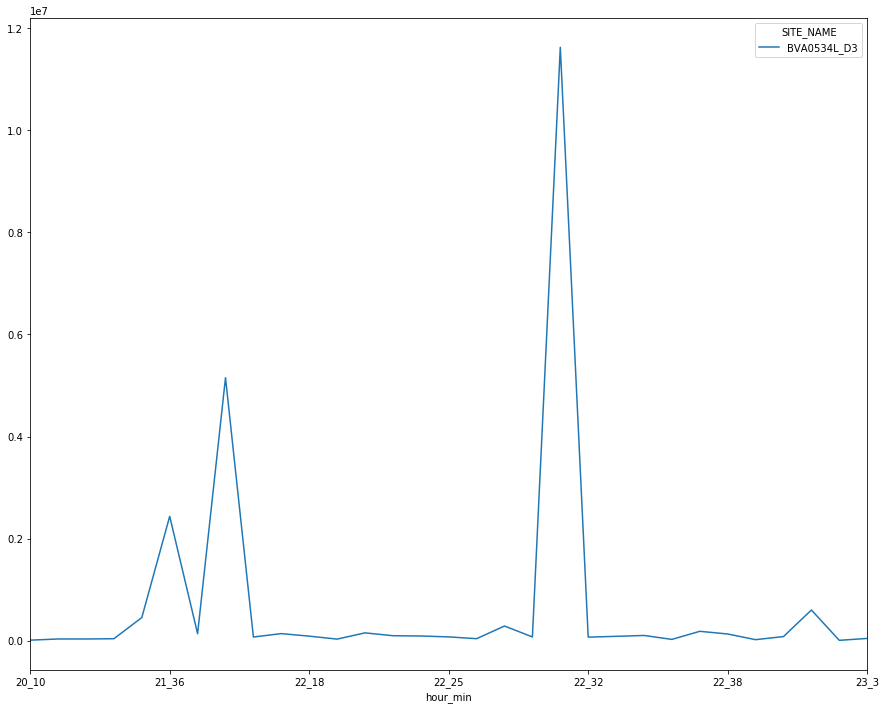

In [60]:
m = input("Enter Market name : ") 
s = input("Enter Site Information : ") 
print("Fetching site wise details of market Vs band", m,"_",s)
df_m_s = df_test.loc[(df_test['AREA'] == m ) & (df_test['SITE_NAME'] == s)]
fig, ax = plt.subplots(figsize=(15,12))
df_m_s.groupby(["hour_min", "SITE_NAME"])["TotalTraffic"].sum().unstack().plot(ax=ax)


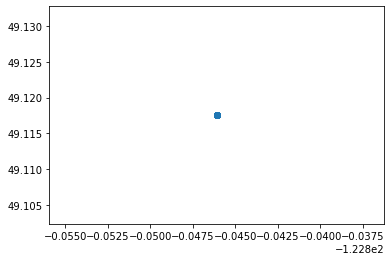

In [61]:
plt.scatter(x=df_m_s['LONGITUDE'], y=df_m_s['LATITUDE'])
plt.show()

In [ ]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

df = pd.read_csv("Long_Lats.csv", delimiter=',', skiprows=0, low_memory=False)

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [ ]:
#making group of 5 mins interval

In [56]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import descartes
import geopandas as gpd
from shapely.geometry import Point,Polygon
%matplotlib inline

warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'geopandas'